In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


In [56]:
df_main = pd.read_csv('train.csv')

X = df_main.drop(['approved', # Permanent
                  'image', # Permanent
                  'font',
                  'id',
                  'caption',
                  'parameters_chapter_title',
                  'parameters_chapter_summary',
                  'created_at',
                  'user_id',
                  'parameters_prompt_template_name',
                  'parameters_photo_search_term',
                  'user_created_at',
                  ], axis=1)

y = df_main['approved']

# DROPPING [image, ]

has_NaN = {}
for column in df_main.columns:
    nan_count = 0
    for i in range(df_main[column].size):
        if(pd.isna(df_main[column][i])):
            # print("hi")
            nan_count += 1
        
    # if nan_count > 0:
    has_NaN[column] = nan_count
        
        # print(f"Column '{column}' has {nan_count} NaN values.")

print(df_main.shape)
# has_NaN

(6576, 17)


In [57]:
# df_main
X.head()

,user_edited,parameters_tone,parameters_switchboard_template_name,parameters_theme,has_logo
0,False,promotional,mega-template-3,joyful,True
1,False,promotional,bnw-template-9,black & white,True
2,False,informational,coffee-template-86,coffee,True
3,False,inspirational,bee-template-62-1,bee,False
4,False,informational,tech-template-4,bold tech,False


In [78]:
# Convert NaN to string
for column in X.columns:
    for i in range(X[column].size):
        if(pd.isna(X[column][i])):
            X.loc[i, column] = "NaN"
            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)
categorical_columns = ['user_edited', 'parameters_tone', 'parameters_switchboard_template_name', 'parameters_theme', 'has_logo']

model = CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1, cat_features=categorical_columns)
model.fit(X_train, y_train)

y_test = y_test.tolist()

y_pred = model.predict(X_test).tolist()
for i in range(len(y_pred)): # Convert to boolean
    if y_pred[i] == 'True':
        y_pred[i] = True
    elif y_pred[i] == 'False':
        y_pred[i] = False

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(report)


0:	learn: 0.6837895	total: 32.2ms	remaining: 3.18s
1:	learn: 0.6761358	total: 68.9ms	remaining: 3.38s
2:	learn: 0.6699215	total: 107ms	remaining: 3.46s
3:	learn: 0.6646575	total: 142ms	remaining: 3.42s
4:	learn: 0.6606163	total: 178ms	remaining: 3.39s
5:	learn: 0.6571427	total: 214ms	remaining: 3.36s
6:	learn: 0.6538031	total: 253ms	remaining: 3.35s
7:	learn: 0.6512176	total: 296ms	remaining: 3.4s
8:	learn: 0.6491014	total: 332ms	remaining: 3.35s
9:	learn: 0.6471067	total: 375ms	remaining: 3.37s
10:	learn: 0.6454765	total: 474ms	remaining: 3.83s
11:	learn: 0.6442037	total: 511ms	remaining: 3.75s
12:	learn: 0.6427184	total: 550ms	remaining: 3.68s
13:	learn: 0.6412354	total: 588ms	remaining: 3.61s
14:	learn: 0.6405864	total: 629ms	remaining: 3.57s
15:	learn: 0.6397726	total: 668ms	remaining: 3.5s
16:	learn: 0.6391413	total: 720ms	remaining: 3.51s
17:	learn: 0.6385949	total: 769ms	remaining: 3.5s
18:	learn: 0.6379900	total: 808ms	remaining: 3.44s
19:	learn: 0.6375793	total: 847ms	remainin

ConversionError: Failed to convert value(s) to axis units: array([ True, False,  True, ..., False,  True, False])

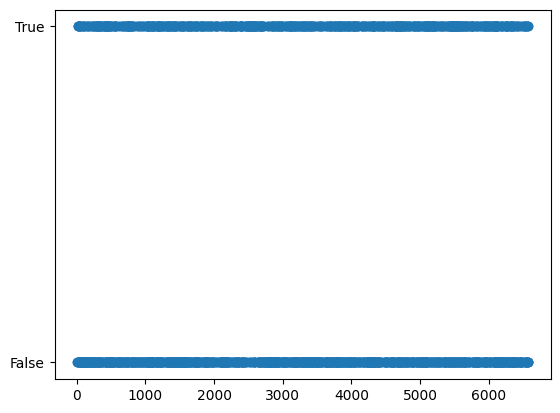

In [61]:
# plt.plot(y_test,'o')
# plt.plot(y_pred,'x')

In [59]:
df_sol = pd.read_csv('test.csv')